In [83]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
init_printing(use_unicode=True)



In [131]:
# Fourier Spectral Methods
# a)
x = symbols('x')
print('a0:')
integrate(1/(2-cos(pi*x)), (x, 0, 2))
# print('a1')
# integrate(cos(x)/(2-cos(pi*x)), (x, 0, 2))


a0:


[5.77350269e-01+0.00000000e+00j 1.54700538e-01-4.44089210e-18j
 4.14518843e-02+1.38777878e-19j 1.11069989e-02+1.11022302e-18j
 2.97611139e-03+2.22860737e-18j 7.97446645e-04+1.96576590e-18j
 2.13675184e-04-1.39347758e-18j 5.72540931e-05-3.79639600e-18j]


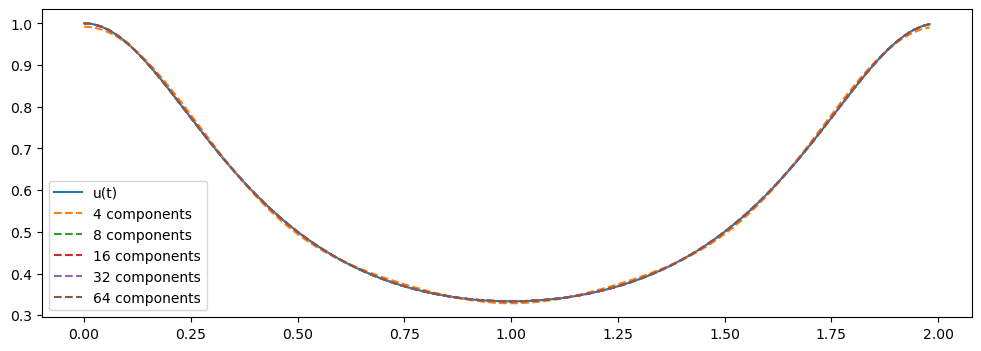

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to approximate
def u(x):
    #return abs(x-1) + abs(x) # sanity check
    return 1/(2-np.cos(x*np.pi))

# Number of sample points
N = 100
# Sample spacing
x = np.linspace(0.0, 2, N, endpoint=False) #change 2 to eg. 0.1 to zoom in
y = u(x)

# Compute the Fourier coefficients
yf = np.fft.fft(y)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='u(t)')

Ns = [4,8,16,32,64] # Number of coefficients to keep
for num_coefficients in Ns: 
    # Zero out higher-order coefficients
    yf_truncated = np.zeros_like(yf)
    yf_truncated[:num_coefficients] = yf[:num_coefficients]
    yf_truncated[-num_coefficients+1:] = yf[-num_coefficients+1:]

    # Reconstruct the function using the truncated Fourier coefficients
    y_reconstructed = np.fft.ifft(yf_truncated)
    plt.plot(x, y_reconstructed.real, label=f'{num_coefficients} components', linestyle='--')

# Plot the original and reconstructed functions

ax.legend()
plt.show()


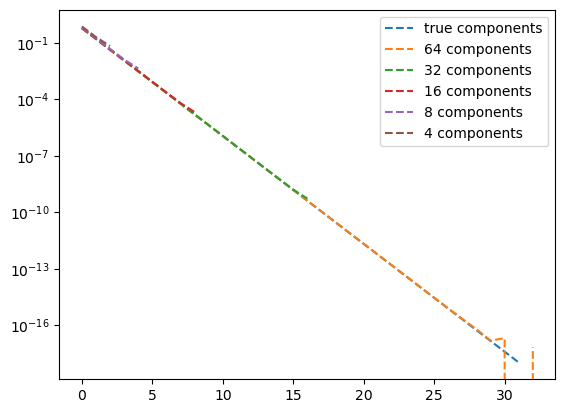

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to approximate
def u(x):
    #return abs(x-1) + abs(x) # sanity check
    return 1/(2-np.cos(x*np.pi))

def cn(n):
    return 1/(np.sqrt(3)*(2+np.sqrt(3))**abs(n))

# Number of sample points
Ns = [4,8,16,32,64]
Ns = [4,8]
Ns = [64,32,16,8,4]

true_cn = cn(np.arange(0,32))
# Plot the original and reconstructed functions
plt.semilogy(true_cn.real, label=f'true components', linestyle='--')

 # Number of coefficients to keep
for N in Ns:
    

    # Sample spacing
    x = np.linspace(0.0, 2, N+1, endpoint=False)
    y = u(x)
    # Compute the Fourier coefficients
   
    yf = np.fft.fft(y)
    yf = np.fft.fftshift(yf)/N

    # plot coeffiecents
    plt.semilogy(yf.real[(N//2):(N+1)], label=f'{N} components', linestyle='--')

plt.legend()
plt.show()


C:\Users\chris\AppData\Local\Temp\ipykernel_1932\3413095206.py:7: RuntimeWarning: invalid value encountered in true_divide
  return 1/N*(np.cos(N*(x-xjs[j])/2)+np.sin((N-1)/2*(x-xjs[j]))/np.sin((x-xjs[j])/2))
C:\Users\chris\AppData\Local\Temp\ipykernel_1932\3413095206.py:7: RuntimeWarning: invalid value encountered in true_divide
  return 1/N*(np.cos(N*(x-xjs[j])/2)+np.sin((N-1)/2*(x-xjs[j]))/np.sin((x-xjs[j])/2))


<Figure size 640x480 with 0 Axes>

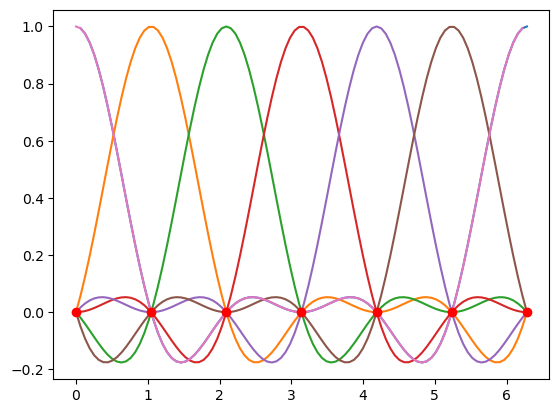

<Figure size 640x480 with 0 Axes>

In [87]:
# part c)
N = 6
xjs = [j*2*np.pi/N for j in range(N+1)]
def lagrange(x,j,N):
    #return 1/N*np.sin(N/2*(x-xjs[j]))*1/(np.tan(1/2*(x-xjs[j])))
    # checking intermediate step
    return 1/N*(np.cos(N*(x-xjs[j])/2)+np.sin((N-1)/2*(x-xjs[j]))/np.sin((x-xjs[j])/2))


x = np.linspace(0.0, 2*np.pi, 100, endpoint=True)
plt.figure()
for j in range(7):
    h = lagrange(x,j,N)
    plt.plot(x,h)

plt.plot(xjs,np.zeros(N+1),'ro')
plt.figure()

In [104]:
# part d) differentiation
N = 10
xjs = np.array([j*2/N for j in range(N)])
def diff_h(N,j,x):
    dx = x-xjs[j]
    return 1/N*(np.cos(N*((dx)/2))*1/np.tan(dx/2)+np.sin(N/2*dx)*(1/2+1/2*np.tan(1/2*dx)**2)/np.tan(1/2*dx)**2)

D = np.zeros((N,N))
for i in range(N):
    for j in range(N):
            if i == j:
                D[i][j] = 0
            else: 
                D[j][i] = diff_h(N,j,xjs[i])
#print(D)
# testing
def v(x):
    return np.exp(np.sin(np.pi*x))

def v_diff_true(x):
    return np.pi*np.cos(np.pi*x)*np.exp(np.sin(np.pi*x))

vx = v(xjs)
vx_diff_true = v_diff_true(xjs)
vx_diff = D @ vx
print(vx_diff)
print(vx_diff_true)







[ 9.64363845  9.23727694  4.11691387 -4.56691158 -8.98601817 -6.82152886
 -2.54127878  0.31363602  1.01637597 -2.1808496 ]
[ 3.14159265  4.57487686  2.5128747  -2.5128747  -4.57487686 -3.14159265
 -1.41200302 -0.37505386  0.37505386  1.41200302]
